### Predictive modeling for Classification Project on OrderAgian Data

### OrderAgain Dataset 

In [1]:
# Data Mining
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw = pd.read_csv("onlinefoods.csv")

In [3]:
raw.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

In [4]:
raw.head(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


**Basic Checks**

In [5]:
raw.shape

(388, 12)

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


**Column Info**

Column|Description
-----------|--------
Age| Age of the individual in years.
Gender| Gender of the individual (male/female).
Occupation| Current occupation of the individual.
Monthly_Income| Monthly income level of the individual.
Educational_Qualifications| Highest educational qualification attained by the individual.
Family_size| Number of members in the individual's family.
Pin_code| Postal code of the individual's residence.
Output| Binary output indicating a positive or negative response.
Feedback| Feedback received for a particular scenario, with values like 'positive' or 'negative'.
Marital_Status| Marital status of the individual (e.g., single).
Area| Residential area or locality of the individual.

### Handling Duplicates

* Convert categorical columns into lower case for duplicates check

### Note

* You need to check before data validation and after validation

In [7]:
raw = raw.drop_duplicates().reset_index(drop=True)

In [8]:
raw[raw.duplicated()]

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback


In [9]:
for i in raw.columns:
    if raw[i].dtype == object:
        raw[i] = raw[i].str.lower()

In [10]:
raw.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,female,single,student,no income,post graduate,4,12.9766,77.5993,560001,yes,positive
1,24,female,single,student,below rs.10000,graduate,3,12.9770,77.5773,560009,yes,positive
2,22,male,single,student,below rs.10000,post graduate,3,12.9551,77.6593,560017,yes,negative
3,22,female,single,student,no income,graduate,6,12.9473,77.5616,560019,yes,positive
4,22,male,single,student,below rs.10000,post graduate,4,12.9850,77.5533,560010,yes,positive


### Checking Missing Values

In [11]:
raw.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

### 1. Data validation & Cleaning

 #### Checking each and every column data
 
   * We are using string methods for this entire analysis
   
   * Here I am modifying all columns data

In [12]:
raw.rename(columns = {'Marital Status':'Marital_Status',
                      'Educational Qualifications':'Educational_Qualifications',
                      'Monthly Income':'Monthly_Income',
                      'Family size':'Family_size','Pin code':'Pin_code'},inplace=True)

In [13]:
raw.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,latitude,longitude,Pin_code,Output,Feedback
0,20,female,single,student,no income,post graduate,4,12.9766,77.5993,560001,yes,positive
1,24,female,single,student,below rs.10000,graduate,3,12.9770,77.5773,560009,yes,positive
2,22,male,single,student,below rs.10000,post graduate,3,12.9551,77.6593,560017,yes,negative
3,22,female,single,student,no income,graduate,6,12.9473,77.5616,560019,yes,positive
4,22,male,single,student,below rs.10000,post graduate,4,12.9850,77.5533,560010,yes,positive


* Data is Valid

* Replacing special characters

    * We will be using replace method in pandas
            * str.replace - Will be used to replace any character in string
            * replace - Will be used to replace entire string
            
    
    

### Python code

**Area**
* We are adding Area column by using latitude and longitude columns 

In [14]:
raw['coordinates'] = raw['latitude'].apply(str)+ "," +raw['longitude'].apply(str)
raw.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,latitude,longitude,Pin_code,Output,Feedback,coordinates
0,20,female,single,student,no income,post graduate,4,12.9766,77.5993,560001,yes,positive,"12.9766,77.5993"
1,24,female,single,student,below rs.10000,graduate,3,12.9770,77.5773,560009,yes,positive,"12.977,77.5773"
2,22,male,single,student,below rs.10000,post graduate,3,12.9551,77.6593,560017,yes,negative,"12.9551,77.6593"
3,22,female,single,student,no income,graduate,6,12.9473,77.5616,560019,yes,positive,"12.9473,77.5616"
4,22,male,single,student,below rs.10000,post graduate,4,12.9850,77.5533,560010,yes,positive,"12.985,77.5533"


In [15]:
# !pip install geopandas
# !pip install geopy
# !pip install geocoder

In [16]:
# Import the necessary libraries

import geopandas as gpd
import geopy
import geocoder
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [17]:
geolocator = Nominatim(user_agent="Nancy Amandi", timeout= 10)
rgeocode = RateLimiter(geolocator.reverse, min_delay_seconds=0.1)
raw["location"] = raw["coordinates"].apply(rgeocode)

In [18]:
raw.head(3)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,latitude,longitude,Pin_code,Output,Feedback,coordinates,location
0,20,female,single,student,no income,post graduate,4,12.9766,77.5993,560001,yes,positive,"12.9766,77.5993","(Mahatma Gandhi Circle, Lavelle Road, Shanthal..."
1,24,female,single,student,below rs.10000,graduate,3,12.9770,77.5773,560009,yes,positive,"12.977,77.5773","(Jayant Probikes & Fitness, 7, 2nd Cross Road,..."
2,22,male,single,student,below rs.10000,post graduate,3,12.9551,77.6593,560017,yes,negative,"12.9551,77.6593","(5th Cross Road, Vinayaka Nagar B Block, Konen..."


In [19]:
def get_suburb(row):
    location = row["location"]
    
    try:
        return location.raw["address"]["suburb"]
    except KeyError:
        return " "

def get_city(row):
    location = row["location"]
    try:
        return location.raw["address"]["city"]
    except KeyError:
        return " "

def get_state(row):
    location = row["location"]
    try:
        return location.raw["address"]["state"]
    except KeyError:
        return " "

In [20]:
raw["city"] = raw.apply(get_suburb, axis=1)
raw["suburb"] = raw.apply(get_city, axis=1)
raw["state"] = raw.apply(get_state, axis=1)
raw.head(3)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,latitude,longitude,Pin_code,Output,Feedback,coordinates,location,city,suburb,state
0,20,female,single,student,no income,post graduate,4,12.9766,77.5993,560001,yes,positive,"12.9766,77.5993","(Mahatma Gandhi Circle, Lavelle Road, Shanthal...",Shanthala Nagar,Bengaluru,Karnataka
1,24,female,single,student,below rs.10000,graduate,3,12.9770,77.5773,560009,yes,positive,"12.977,77.5773","(Jayant Probikes & Fitness, 7, 2nd Cross Road,...",Gandhinagar,Bengaluru,Karnataka
2,22,male,single,student,below rs.10000,post graduate,3,12.9551,77.6593,560017,yes,negative,"12.9551,77.6593","(5th Cross Road, Vinayaka Nagar B Block, Konen...",Konena Agrahara Ward,Bengaluru,Karnataka


### Deleting columns

In [21]:
Delete = ['latitude','longitude','coordinates','location','suburb','state']

In [22]:
raw = raw.drop(columns = Delete)

In [23]:
raw.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,city
0,20,female,single,student,no income,post graduate,4,560001,yes,positive,Shanthala Nagar
1,24,female,single,student,below rs.10000,graduate,3,560009,yes,positive,Gandhinagar
2,22,male,single,student,below rs.10000,post graduate,3,560017,yes,negative,Konena Agrahara Ward
3,22,female,single,student,no income,graduate,6,560019,yes,positive,Hanumanth Nagar Ward
4,22,male,single,student,below rs.10000,post graduate,4,560010,yes,positive,Shivanagara


**Age**

In [24]:
raw.Age.unique(),raw.Age.nunique(),raw.Age.dtype

(array([20, 24, 22, 27, 23, 21, 28, 25, 32, 30, 31, 26, 18, 19, 33, 29],
       dtype=int64),
 16,
 dtype('int64'))

**Gender**

In [25]:
raw.Gender.unique(),raw.Gender.nunique(),raw.Gender.dtype

(array(['female', 'male'], dtype=object), 2, dtype('O'))

**Marital_Status**

In [26]:
raw.Marital_Status = raw.Marital_Status.str.replace(" ","_")

In [27]:
raw.Marital_Status.unique(),raw.Marital_Status.nunique(),raw.Marital_Status.dtype

(array(['single', 'married', 'prefer_not_to_say'], dtype=object),
 3,
 dtype('O'))

**Occupation**

In [28]:
raw.Occupation = raw.Occupation.str.replace(" ","_")

In [29]:
raw.Occupation.unique(),raw.Occupation.nunique(),raw.Occupation.dtype

(array(['student', 'employee', 'self_employeed', 'house_wife'],
       dtype=object),
 4,
 dtype('O'))

#### Monthly_Income

In [30]:
raw.Monthly_Income = raw.Monthly_Income.str.replace(" ","_").str.replace("_rs.","_")

In [31]:
raw.Monthly_Income.unique(),raw.Monthly_Income.nunique(),raw.Monthly_Income.dtype

(array(['no_income', 'below_10000', 'more_than_50000', '10001_to_25000',
        '25001_to_50000'], dtype=object),
 5,
 dtype('O'))

In [32]:
raw.Monthly_Income.replace({"no_income":"no_income",
                            "below_10000":"low_income",
                            "10001_to_25000":"moderate_income",
                            "25001_to_50000":"high_income",
                            "more_than_50000":"very_high_income"},inplace = True)                           

In [33]:
raw.Monthly_Income.value_counts()

no_income           131
high_income          52
very_high_income     47
moderate_income      36
low_income           19
Name: Monthly_Income, dtype: int64

* Data is valid
* Replace the Special charcters and also replace the column data properly in the Monthly_Income.

**Educational_Qualifications**

In [34]:
raw.Educational_Qualifications = raw.Educational_Qualifications.str.replace(" ","_").str.replace(".","_")

In [35]:
raw.Educational_Qualifications.unique(),raw.Educational_Qualifications.nunique(),raw.Educational_Qualifications.dtype

(array(['post_graduate', 'graduate', 'ph_d', 'uneducated', 'school'],
       dtype=object),
 5,
 dtype('O'))

**Family_size**

In [36]:
raw.Family_size.unique(),raw.Family_size.nunique(),raw.Family_size.dtype

(array([4, 3, 6, 2, 5, 1], dtype=int64), 6, dtype('int64'))

**Pin_code**	

In [37]:
raw.Pin_code.unique(),raw.Pin_code.nunique(),raw.Pin_code.dtype

(array([560001, 560009, 560017, 560019, 560010, 560103, 560042, 560048,
        560078, 560004, 560068, 560038, 560008, 560032, 560033, 560021,
        560085, 560050, 560098, 560003, 560066, 560034, 560102, 560025,
        560026, 560043, 560002, 560086, 560076, 560096, 560029, 560046,
        560030, 560024, 560020, 560028, 560064, 560036, 560011, 560061,
        560022, 560027, 560007, 560012, 560006, 560047, 560005, 560073,
        560016, 560013, 560051, 560015, 560018, 560109, 560023, 560104,
        560041, 560049, 560045, 560055, 560060, 560062, 560070, 560075,
        560080, 560092, 560095, 560097, 560093, 560091, 560100, 560079,
        560059, 560067, 560014, 560056, 560072], dtype=int64),
 77,
 dtype('int64'))

**Output** 

In [38]:
raw.Output.unique(),raw.Output.nunique(),raw.Output.dtype

(array(['yes', 'no'], dtype=object), 2, dtype('O'))

**Feedback**

In [39]:
raw.Feedback = raw.Feedback.str.replace(" ","")

In [40]:
raw.Feedback.unique(),raw.Feedback.nunique(),raw.Feedback.dtype

(array(['positive', 'negative'], dtype=object), 2, dtype('O'))

**city to Area**

In [41]:
raw.rename(columns = {'city':'Area'},inplace = True)                   

In [42]:
raw.Area = raw.Area.str.replace(" ","_")

In [43]:
raw.Area.unique(),raw.Area.nunique(),raw.Area.dtype

(array(['Shanthala_Nagar', 'Gandhinagar', 'Konena_Agrahara_Ward',
        'Hanumanth_Nagar_Ward', 'Shivanagara', 'Devarabeesanahalli',
        'Halasooru', 'Garudachara_Palya', 'Jaraganahalli_Ward',
        'Basavanagudi', 'Mangammanapalya', 'Hoysala_Nagara',
        'Sulthanpalya', 'Maruthi_Seva_Nagar', 'Sriramapura',
        'Banashankari_3rd_Stage', 'Banashankari_2nd_Stage',
        'Srinivasapura', 'Malleswaram', 'Hagadur', 'Koramangala',
        'HSR_Layout', 'Ashok_Nagar', 'Valmiki_Nagar', 'Banasavadi',
        'Dharmaraya_Swamy_Temple_Ward', 'Nagapura_Ward', 'Arekere',
        'Nandini_Layout', 'Suddagunte_Palya_Ward', 'Jayamahal_Ward',
        'Adugodi', 'Kempapura', 'Thyagaraja_Nagar',
        'Yelahanka_Satellite_Town', 'Bellanduru', 'Jayanagar_East',
        'Subramanyapura', 'HMT_Ward', 'Hombegowda_Nagara', 'Agaram',
        'Sadashivanagar', 'Vannarpete_Ward', 'Cox_Town',
        'Dodda_Bidarakallu', 'Kowdenahalli', 'Jalahalli', 'Vasanth_Nagar',
        'Shettihalli', 'Cha

In [44]:
data = ['Age','Gender','Occupation','Monthly_Income','Educational_Qualifications','Family_size','Pin_code','Output','Feedback','Marital_Status','Area']

In [45]:
raw = raw[data]

In [46]:
raw.head()

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Marital_Status,Area
0,20,female,student,no_income,post_graduate,4,560001,yes,positive,single,Shanthala_Nagar
1,24,female,student,low_income,graduate,3,560009,yes,positive,single,Gandhinagar
2,22,male,student,low_income,post_graduate,3,560017,yes,negative,single,Konena_Agrahara_Ward
3,22,female,student,no_income,graduate,6,560019,yes,positive,single,Hanumanth_Nagar_Ward
4,22,male,student,low_income,post_graduate,4,560010,yes,positive,single,Shivanagara


### Validated data

### 2. Data understanding & EDA(Exploratory Data Analysis) 

* We can get insights on dataset using Exploratory Data Analysis (EDA) methods

* EDA can be of two things, 
    - Statistics
        - Descriptive
        - Inferential
    - Visual Analysis

**Understanding Column Data Types in stats point of view**

In [47]:
raw.dtypes

Age                            int64
Gender                        object
Occupation                    object
Monthly_Income                object
Educational_Qualifications    object
Family_size                    int64
Pin_code                       int64
Output                        object
Feedback                      object
Marital_Status                object
Area                          object
dtype: object

**Numerical and Categorical data**

**Numerical and Categorical data**

Numerical(Quantitative) | Categorical(Qualitative)
--|---------------------
Age | Gender
Family_size|Marital_status
-|Occupation 
-|Monthly_income
-|Educationl_Qualifications
-|Output
-|Feedback 
-|Pin_code
-|Area

**When we have input and ouput variables mentioned**

* Taking important input columns to analysis with reference to the output variable is suggested for analysis.

**For this data we have output variable is Output**

* All the Columns are using for analysis

Analysis Need to be Studied

**Uni-variate** | **Bi_Variate** | **Multi-Variate**
------------|------------|---------------
**One Column Study**|**Anyone column with Output Column study**|**Combination of two or more columns with Output column study**
Descriptive|Descriptive|Descriptive
Visual Analysis|Visual Analysis|Visual Analysis

In [48]:
raw.head(5)

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Marital_Status,Area
0,20,female,student,no_income,post_graduate,4,560001,yes,positive,single,Shanthala_Nagar
1,24,female,student,low_income,graduate,3,560009,yes,positive,single,Gandhinagar
2,22,male,student,low_income,post_graduate,3,560017,yes,negative,single,Konena_Agrahara_Ward
3,22,female,student,no_income,graduate,6,560019,yes,positive,single,Hanumanth_Nagar_Ward
4,22,male,student,low_income,post_graduate,4,560010,yes,positive,single,Shivanagara


In [49]:
raw.columns, raw.dtypes

(Index(['Age', 'Gender', 'Occupation', 'Monthly_Income',
        'Educational_Qualifications', 'Family_size', 'Pin_code', 'Output',
        'Feedback', 'Marital_Status', 'Area'],
       dtype='object'),
 Age                            int64
 Gender                        object
 Occupation                    object
 Monthly_Income                object
 Educational_Qualifications    object
 Family_size                    int64
 Pin_code                       int64
 Output                        object
 Feedback                      object
 Marital_Status                object
 Area                          object
 dtype: object)

In [50]:
raw.Output.describe()

count     285
unique      2
top       yes
freq      217
Name: Output, dtype: object

In [51]:
raw.Output.value_counts()

yes    217
no      68
Name: Output, dtype: int64

### Balancing Data

 **OverSampling of Y data - Duplicates**

* Minority classes data will be added again and again to balance the count of majority class

In [52]:
raw.head()

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Marital_Status,Area
0,20,female,student,no_income,post_graduate,4,560001,yes,positive,single,Shanthala_Nagar
1,24,female,student,low_income,graduate,3,560009,yes,positive,single,Gandhinagar
2,22,male,student,low_income,post_graduate,3,560017,yes,negative,single,Konena_Agrahara_Ward
3,22,female,student,no_income,graduate,6,560019,yes,positive,single,Hanumanth_Nagar_Ward
4,22,male,student,low_income,post_graduate,4,560010,yes,positive,single,Shivanagara


We need to add 81 rows of 'n' class values to the data

In [53]:
nclasssample = pd.concat([raw[raw.Output=='no'], raw[raw.Output=='no'].sample(40)], axis=0).reset_index(drop=True)

In [54]:
nclasssample.head()

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Marital_Status,Area
0,25,male,student,no_income,post_graduate,5,560009,no,positive,single,Gandhinagar
1,24,female,student,moderate_income,post_graduate,3,560028,no,positive,single,Thyagaraja_Nagar
2,28,male,self_employeed,moderate_income,graduate,2,560022,no,negative,married,HMT_Ward
3,27,female,employee,high_income,post_graduate,5,560022,no,positive,prefer_not_to_say,HMT_Ward
4,26,male,self_employeed,moderate_income,ph_d,1,560066,no,positive,single,Hagadur


In [55]:
nclasssample1 = pd.concat([raw[raw.Output=='no'].sample(41)], axis=0).reset_index(drop=True)

In [56]:
nclasssample1.head()

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Marital_Status,Area
0,32,female,employee,very_high_income,graduate,1,560003,no,positive,married,Malleswaram
1,26,male,employee,high_income,graduate,5,560007,no,positive,married,Agaram
2,26,male,employee,moderate_income,graduate,4,560060,no,positive,married,Kengeri
3,24,female,student,no_income,post_graduate,5,560015,no,negative,single,Shettihalli
4,26,female,employee,high_income,post_graduate,2,560023,no,negative,married,Kempapura_Agrahara_Ward


In [57]:
balanced_data = pd.concat([raw, nclasssample, nclasssample1]).reset_index(drop=True)

In [58]:
balanced_data

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Marital_Status,Area
0,20,female,student,no_income,post_graduate,4,560001,yes,positive,single,Shanthala_Nagar
1,24,female,student,low_income,graduate,3,560009,yes,positive,single,Gandhinagar
2,22,male,student,low_income,post_graduate,3,560017,yes,negative,single,Konena_Agrahara_Ward
3,22,female,student,no_income,graduate,6,560019,yes,positive,single,Hanumanth_Nagar_Ward
4,22,male,student,low_income,post_graduate,4,560010,yes,positive,single,Shivanagara
...,...,...,...,...,...,...,...,...,...,...,...
429,21,female,employee,low_income,graduate,2,560021,no,negative,single,Sriramapura
430,23,male,student,no_income,post_graduate,2,560009,no,negative,single,Gandhinagar
431,24,female,student,moderate_income,post_graduate,3,560028,no,positive,single,Thyagaraja_Nagar
432,21,male,student,no_income,graduate,2,560018,no,negative,single,Chamarajapete


In [59]:
balanced_data.Output.value_counts()

yes    217
no     217
Name: Output, dtype: int64

**Balancing duplicates**

In [60]:
balanced_data[balanced_data.duplicated()]

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Marital_Status,Area
285,25,male,student,no_income,post_graduate,5,560009,no,positive,single,Gandhinagar
286,24,female,student,moderate_income,post_graduate,3,560028,no,positive,single,Thyagaraja_Nagar
287,28,male,self_employeed,moderate_income,graduate,2,560022,no,negative,married,HMT_Ward
288,27,female,employee,high_income,post_graduate,5,560022,no,positive,prefer_not_to_say,HMT_Ward
289,26,male,self_employeed,moderate_income,ph_d,1,560066,no,positive,single,Hagadur
...,...,...,...,...,...,...,...,...,...,...,...
429,21,female,employee,low_income,graduate,2,560021,no,negative,single,Sriramapura
430,23,male,student,no_income,post_graduate,2,560009,no,negative,single,Gandhinagar
431,24,female,student,moderate_income,post_graduate,3,560028,no,positive,single,Thyagaraja_Nagar
432,21,male,student,no_income,graduate,2,560018,no,negative,single,Chamarajapete


**Uni-Variate analysis on Categorical**

In [61]:
raw.Gender.value_counts(),raw.Gender.mode()

(male      164
 female    121
 Name: Gender, dtype: int64,
 0    male
 Name: Gender, dtype: object)

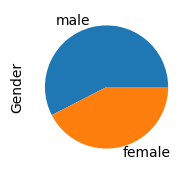

In [62]:
plt.figure(figsize=(3,2))
raw['Gender'].value_counts().plot(kind='pie')
plt.show()

* In this gender male has high value_counts 164. 

In [63]:
raw.Marital_Status.value_counts(),raw.Marital_Status.mode()

(single               189
 married               87
 prefer_not_to_say      9
 Name: Marital_Status, dtype: int64,
 0    single
 Name: Marital_Status, dtype: object)

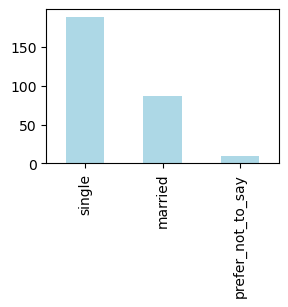

In [64]:
plt.figure(figsize=(3,2))
raw['Marital_Status'].value_counts().plot(kind='bar',color = 'lightblue')
plt.show()

* In marital_status singles have high value_counts with 189.  

In [65]:
raw.Occupation.value_counts(),raw.Occupation.mode()

(student           144
 employee           94
 self_employeed     38
 house_wife          9
 Name: Occupation, dtype: int64,
 0    student
 Name: Occupation, dtype: object)

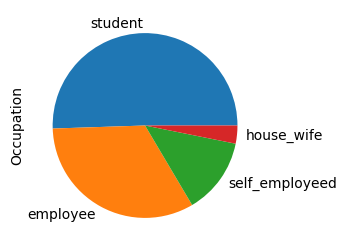

In [66]:
plt.figure(figsize=(4,3))
raw['Occupation'].value_counts().plot(kind='pie')
plt.show()

* In Occupation Students are very high with 144. 

In [67]:
raw.Monthly_Income.value_counts(),raw.Monthly_Income.mode()

(no_income           131
 high_income          52
 very_high_income     47
 moderate_income      36
 low_income           19
 Name: Monthly_Income, dtype: int64,
 0    no_income
 Name: Monthly_Income, dtype: object)

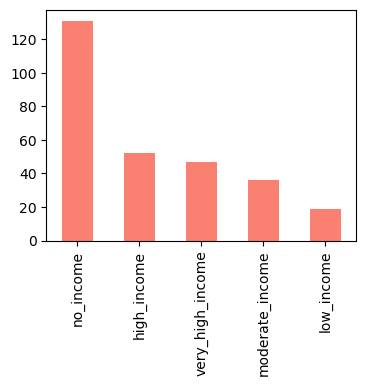

In [68]:
plt.figure(figsize=(4,3))
raw['Monthly_Income'].value_counts().plot(kind='bar', color = 'salmon')
plt.show()

* In monthly_income there are no_income has high value with 131.  

In [69]:
raw.Educational_Qualifications.value_counts(),raw.Educational_Qualifications.mode()

(graduate         126
 post_graduate    125
 ph_d              21
 school            11
 uneducated         2
 Name: Educational_Qualifications, dtype: int64,
 0    graduate
 Name: Educational_Qualifications, dtype: object)

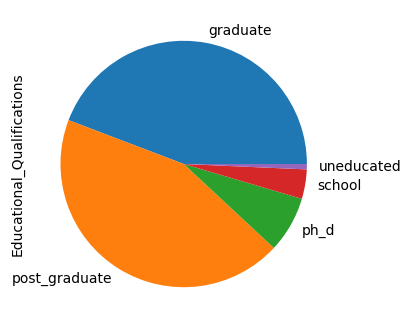

In [70]:
plt.figure(figsize=(5,4))
raw['Educational_Qualifications'].value_counts().plot(kind='pie')
plt.show()

* In Educational_Qualifications there are graduate are high with 126   

In [71]:
balanced_data.Output.value_counts(),balanced_data.Output.mode()

(yes    217
 no     217
 Name: Output, dtype: int64,
 0     no
 1    yes
 Name: Output, dtype: object)

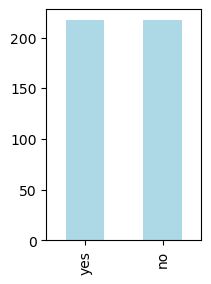

In [72]:
plt.figure(figsize=(2,3))
balanced_data['Output'].value_counts().plot(kind='bar',color = 'lightblue')
plt.show()

* In Output column we have balanced.

In [73]:
raw.Feedback.value_counts(),raw.Feedback.mode()

(positive    231
 negative     54
 Name: Feedback, dtype: int64,
 0    positive
 Name: Feedback, dtype: object)

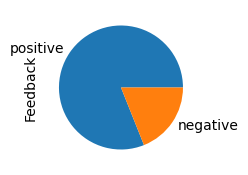

In [74]:
plt.figure(figsize=(2,3))
raw['Feedback'].value_counts().plot(kind='pie')
plt.show()

* In Feedback positive has high values with 231. 

In [75]:
raw.Area.value_counts(),raw.Area.mode()

(Gandhinagar          27
 Hoysala_Nagara       16
 Malleswaram          11
 Sadashivanagar        9
 Agaram                9
                      ..
 K_R_Puram             1
 Dodda_Bidarakallu     1
 Hampi_Nagar           1
 Vasanth_Nagar         1
 Nagarabhavi           1
 Name: Area, Length: 71, dtype: int64,
 0    Gandhinagar
 Name: Area, dtype: object)

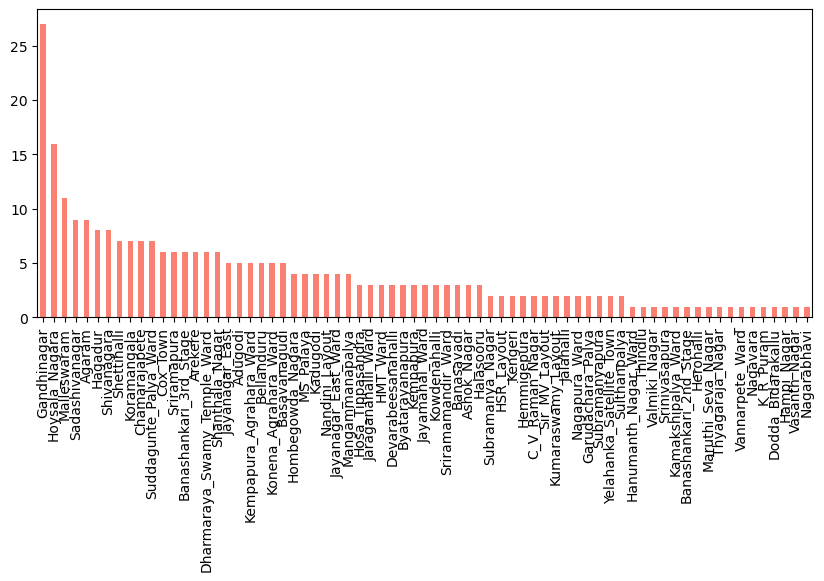

In [76]:
plt.figure(figsize=(10,4))
raw['Area'].value_counts().plot(kind='bar',color = 'salmon')
plt.show()

* In Area column Gandhinagar has high value with 27.   

**Uni-Variate analysis**

**On Numerical columns**

In [77]:
raw['Age'].describe(),raw['Age'].skew(),raw['Age'].kurtosis()

(count    285.000000
 mean      24.677193
 std        3.040977
 min       18.000000
 25%       23.000000
 50%       24.000000
 75%       26.000000
 max       33.000000
 Name: Age, dtype: float64,
 0.7430766506943454,
 0.18885877289151143)

<Axes: title={'center': 'Boxplot of price'}, ylabel='Age'>

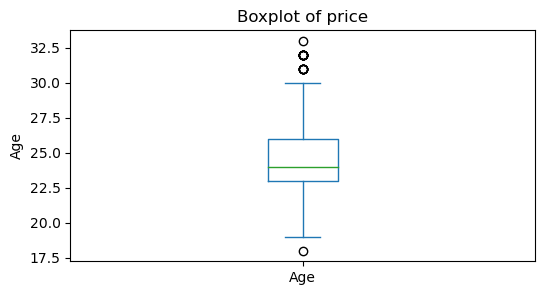

In [78]:
raw.Age.plot(kind='box',title='Boxplot of price',ylabel='Age',figsize=(6,3))

* There are outliers in Age column

In [79]:
raw['Family_size'].describe(),raw['Family_size'].skew(),raw['Family_size'].kurtosis()

(count    285.000000
 mean       3.270175
 std        1.361178
 min        1.000000
 25%        2.000000
 50%        3.000000
 75%        4.000000
 max        6.000000
 Name: Family_size, dtype: float64,
 0.43711233822269807,
 -0.6276434829350501)

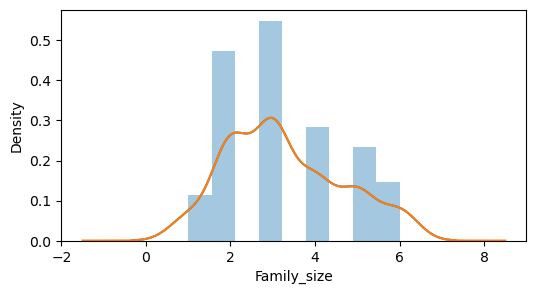

In [80]:
plt.figure(figsize=(6, 3))
sns.distplot(raw['Family_size'])
raw['Family_size'].plot(kind = 'density')
plt.show()

* Family_size has maximum density at 3.

<Axes: ylabel='Density'>

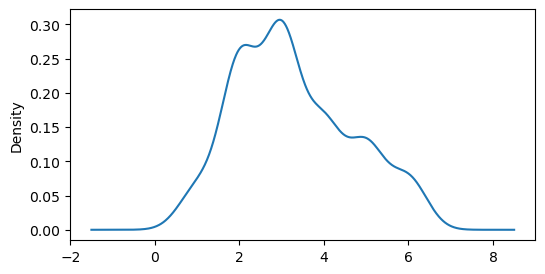

In [81]:
plt.figure(figsize=(6, 3))
raw.Family_size.plot(kind='density')

**Bi-Variate analysis on N-N**

**Data Study between two columns**

**Numerical to Numerical**

In [82]:
raw.head()

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Marital_Status,Area
0,20,female,student,no_income,post_graduate,4,560001,yes,positive,single,Shanthala_Nagar
1,24,female,student,low_income,graduate,3,560009,yes,positive,single,Gandhinagar
2,22,male,student,low_income,post_graduate,3,560017,yes,negative,single,Konena_Agrahara_Ward
3,22,female,student,no_income,graduate,6,560019,yes,positive,single,Hanumanth_Nagar_Ward
4,22,male,student,low_income,post_graduate,4,560010,yes,positive,single,Shivanagara


In [83]:
raw.corr()

,Age,Family_size,Pin_code
Age,1.000000,0.212541,0.051374
Family_size,0.212541,1.000000,0.015686
Pin_code,0.051374,0.015686,1.000000


<Axes: >

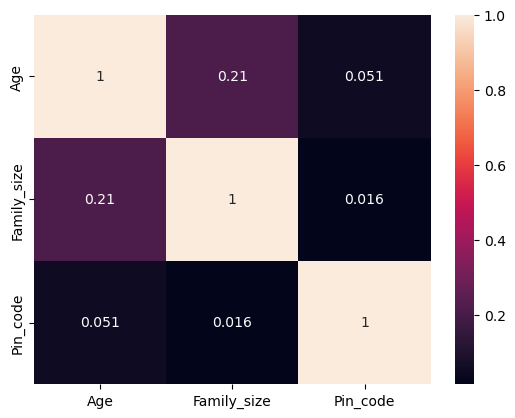

In [84]:
sns.heatmap(raw.corr(),annot = True)

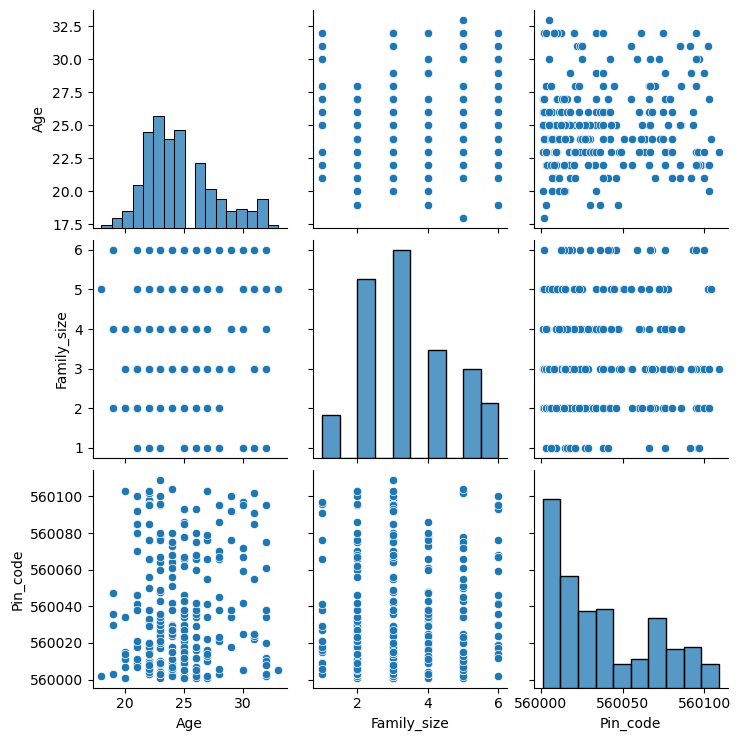

In [85]:
sns.pairplot(raw.iloc[0:500])

* Here it is showing all correlation values

**Numerical to Categorical**

In [86]:
raw.head()

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Marital_Status,Area
0,20,female,student,no_income,post_graduate,4,560001,yes,positive,single,Shanthala_Nagar
1,24,female,student,low_income,graduate,3,560009,yes,positive,single,Gandhinagar
2,22,male,student,low_income,post_graduate,3,560017,yes,negative,single,Konena_Agrahara_Ward
3,22,female,student,no_income,graduate,6,560019,yes,positive,single,Hanumanth_Nagar_Ward
4,22,male,student,low_income,post_graduate,4,560010,yes,positive,single,Shivanagara


In [87]:
((raw.groupby("Monthly_Income")['Age'].mean()/len(raw))*100).sort_values(ascending  = False)

Monthly_Income
very_high_income    9.585666
high_income         9.197031
moderate_income     8.674464
low_income          8.328717
no_income           8.155886
Name: Age, dtype: float64

<Axes: ylabel='Monthly_Income'>

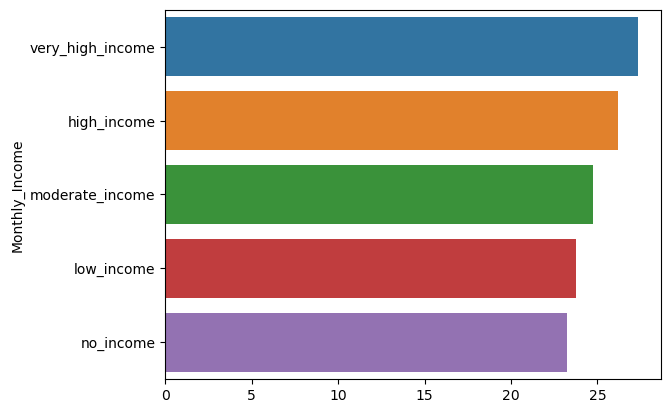

In [88]:
sns.barplot(y = raw.groupby('Monthly_Income')['Age'].mean().sort_values(ascending=False).index[0:5],
            x = raw.groupby('Monthly_Income')['Age'].mean().sort_values(ascending=False).values[0:5],orient ='h')

* Very high income has hightest in the Monthly_income and Age

In [89]:
((raw.groupby("Occupation")['Family_size'].mean()/len(raw))*100).sort_values(ascending  = False)

Occupation
house_wife        1.676413
self_employeed    1.255771
employee          1.138485
student           1.091618
Name: Family_size, dtype: float64

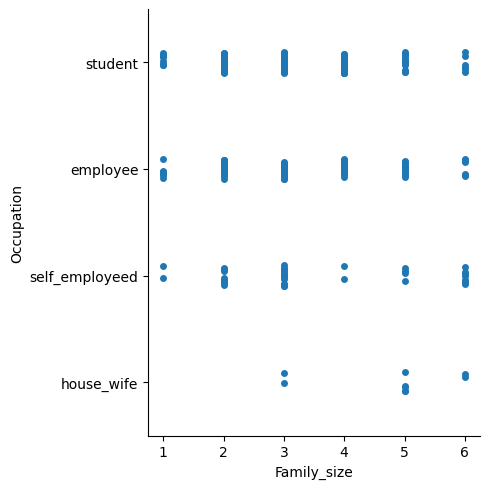

In [90]:
sns.catplot(y='Occupation', x ='Family_size', data = raw, orient='h')

In [91]:
((raw.groupby('Area')['Age'].mean()/len(raw))*100).sort_values(ascending  = False)

Area
Herohalli                 10.877193
Nagarabhavi               10.526316
Thindlu                   10.526316
Subramanya_Nagar          10.175439
HMT_Ward                  10.058480
                            ...    
Srinivasapura              7.719298
Maruthi_Seva_Nagar         7.719298
Hanumanth_Nagar_Ward       7.719298
Banashankari_2nd_Stage     7.719298
Vannarpete_Ward            6.666667
Name: Age, Length: 71, dtype: float64

<Axes: ylabel='Area'>

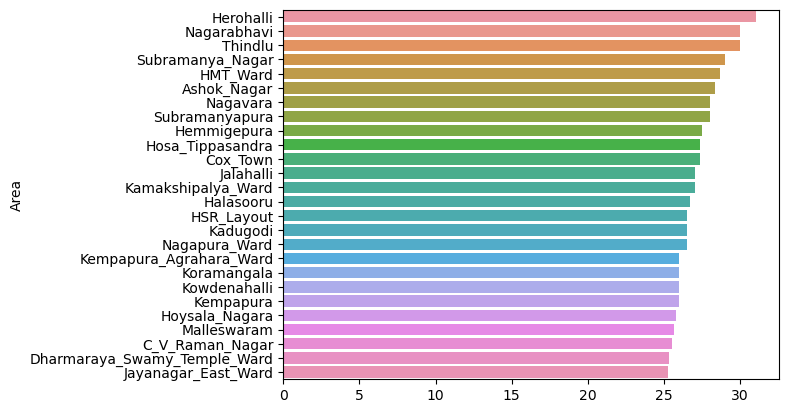

In [92]:
sns.barplot(y = raw.groupby('Area')['Age'].mean().sort_values(ascending=False).index[0:26],
            x = raw.groupby('Area')['Age'].mean().sort_values(ascending=False).values[0:26],orient ='h')

* Herohalli has hightest value in the Age and Area

**Categorical to Categorical**

In [93]:
raw.head(2)

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Marital_Status,Area
0,20,female,student,no_income,post_graduate,4,560001,yes,positive,single,Shanthala_Nagar
1,24,female,student,low_income,graduate,3,560009,yes,positive,single,Gandhinagar


In [94]:
pd.crosstab(raw.Occupation,raw.Output,margins=True)

Output,no,yes,All
Occupation,,,
employee,34,60,94
house_wife,2,7,9
self_employeed,14,24,38
student,18,126,144
All,68,217,285


<Axes: xlabel='count', ylabel='Output'>

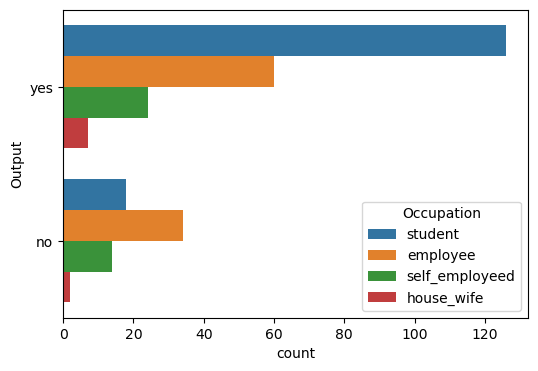

In [95]:
plt.figure(figsize=(6,4))
sns.countplot(y='Output', hue='Occupation', data = raw)

* In occupation the Student has hightest count in output.

In [96]:
pd.crosstab(raw.Output,raw.Monthly_Income,margins=True)

Monthly_Income,high_income,low_income,moderate_income,no_income,very_high_income,All
Output,,,,,,
no,19,4,9,19,17,68
yes,33,15,27,112,30,217
All,52,19,36,131,47,285


<Axes: xlabel='count', ylabel='Output'>

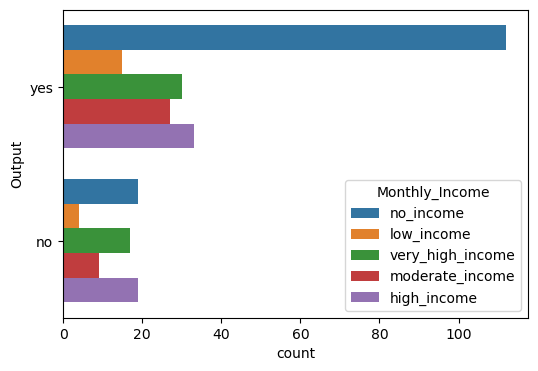

In [97]:
plt.figure(figsize=(6,4))
sns.countplot(y='Output', hue='Monthly_Income', data = raw)

* In Monthly_income the No_income has hightest count in the output column. 

In [98]:
pd.crosstab(raw.Output,raw.Educational_Qualifications, margins=True)

Educational_Qualifications,graduate,ph_d,post_graduate,school,uneducated,All
Output,,,,,,
no,37,7,21,2,1,68
yes,89,14,104,9,1,217
All,126,21,125,11,2,285


<Axes: xlabel='Output', ylabel='count'>

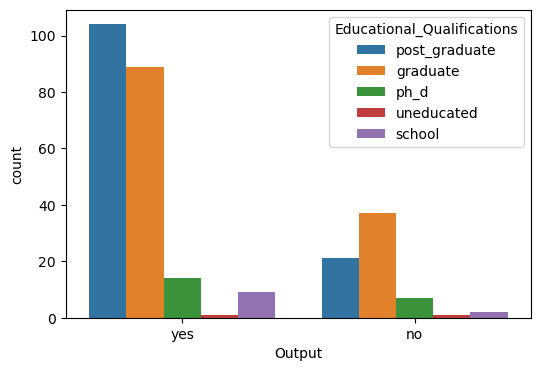

In [99]:
plt.figure(figsize=(6,4))
sns.countplot(x='Output', hue='Educational_Qualifications', data = raw)

* Post graduate has hightest count in output

### Insights
* We have done balacing to the output column Output with a method called over sampling by adding 149vales to the actual data. 
* Male have highest value counts in Gender column
* Single have highest value counts in Marital_Status column
* sn Occupation Students are very high with 144
* more number of people have no_income in terms of salary 
* graduated people are high where uneducated are only 2people
* Output column is balanced with same count
* In Family_size density id betwwen 2-4 with 3
* positive have highest value counts in Feedback column with 90%
* Gandhinagar have ordered more with 27 and Nagarabhavi have least ordered with 1
* Age column is with minimum of 18% and maximum of 33%
* Family_size have minimum of 1% and maximum of 6%
* There are outliers in age column
* In Monthly_Income there is high in very very_high_income and low in no_income
* Occupation Family_size in between these two there are people with no_income are high
* hero_hally has highest value in the age and area.
* Student has highest count in Output.
* In monthly the no_income has highest count in the Output column.
* Postgraduate has highest count in output.

In [100]:
raw.head(5)

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Output,Feedback,Marital_Status,Area
0,20,female,student,no_income,post_graduate,4,560001,yes,positive,single,Shanthala_Nagar
1,24,female,student,low_income,graduate,3,560009,yes,positive,single,Gandhinagar
2,22,male,student,low_income,post_graduate,3,560017,yes,negative,single,Konena_Agrahara_Ward
3,22,female,student,no_income,graduate,6,560019,yes,positive,single,Hanumanth_Nagar_Ward
4,22,male,student,low_income,post_graduate,4,560010,yes,positive,single,Shivanagara


### Predictive Modeling
    
* Above data will be given to a machine learning model, where the model will be trained on column data output with other columns data.     
    
* predictive modeling is sending data to a algorithm as input columns(x) along with one output column data (y), training y data with x
    
    model: y~x --> y = f(x)+e

### X & y
* This is the method where to identify according to business goal.  
    * output as y and 
    * x as input column

In [101]:
x = raw.drop('Output', axis = 1) # input column
y = raw['Output']                # output column

In [102]:
x.head(2)

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Marital_Status,Area
0,20,female,student,no_income,post_graduate,4,560001,positive,single,Shanthala_Nagar
1,24,female,student,low_income,graduate,3,560009,positive,single,Gandhinagar


In [103]:
y.head(2)

0    yes
1    yes
Name: Output, dtype: object

* Here we are splitting the columns into x and y 

### Feature Engineering 
   

**Feature Selection/Deletion**

In [104]:
x

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Marital_Status,Area
0,20,female,student,no_income,post_graduate,4,560001,positive,single,Shanthala_Nagar
1,24,female,student,low_income,graduate,3,560009,positive,single,Gandhinagar
2,22,male,student,low_income,post_graduate,3,560017,negative,single,Konena_Agrahara_Ward
3,22,female,student,no_income,graduate,6,560019,positive,single,Hanumanth_Nagar_Ward
4,22,male,student,low_income,post_graduate,4,560010,positive,single,Shivanagara
...,...,...,...,...,...,...,...,...,...,...
280,21,male,student,no_income,graduate,2,560046,positive,single,Jayamahal_Ward
281,31,male,employee,very_high_income,ph_d,3,560085,positive,married,Banashankari_3rd_Stage
282,30,male,employee,very_high_income,post_graduate,6,560095,positive,married,Agaram
283,21,male,student,no_income,graduate,3,560092,negative,single,Byatarayanapura


###  Handling Missing Values & Outliers 

No missing values present in our data

In [105]:
x.shape

(285, 10)

In [106]:
x.isnull().sum()

Age                           0
Gender                        0
Occupation                    0
Monthly_Income                0
Educational_Qualifications    0
Family_size                   0
Pin_code                      0
Feedback                      0
Marital_Status                0
Area                          0
dtype: int64

In [107]:
x.describe()

,Age,Family_size,Pin_code
count,285.000000,285.000000,285.000000
mean,24.677193,3.270175,560037.280702
std,3.040977,1.361178,30.738306
min,18.000000,1.000000,560001.000000
25%,23.000000,2.000000,560010.000000
50%,24.000000,3.000000,560028.000000
75%,26.000000,4.000000,560066.000000
max,33.000000,6.000000,560109.000000


### Outlier detection

In [109]:
def outlier_detect(df):
    for i in df.describe().columns:
        print("Column:",i)
        print("------------------------------------------------")
        Q1 = df.describe().at['25%',i]
        Q3 = df.describe().at['75%',i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        print("Lower Outliers:")
        print()
        lowerout = list(df[df[i]<LTV][i])
        lowerout.sort()
        print(lowerout)
        print()        
        print("Upper Outliers:")
        print()
        upperout = list(df[df[i]>UTV][i])
        upperout.sort()
        print(upperout) 
        print()

In [110]:
outlier_detect(raw)

Column: Age
------------------------------------------------
Lower Outliers:

[18]

Upper Outliers:

[31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33]

Column: Family_size
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]

Column: Pin_code
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[]



In [111]:
def outlier_replacement(df):
    for i in df.describe().columns:
        Q1 = df.describe().at['25%',i]
        Q3 = df.describe().at['75%',i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        
        # replacement vals
        median = df[i].median()
        low_bound = LTV
        high_bound = UTV
        fifth = df[i].quantile(0.05)
        ninetyfifth = df[i].quantile(0.95)
        
        # mask method is used to replace the values
        df[i] = df[i].mask(df[i]<LTV, low_bound) # replacing the outlier with ltv (25% value)
        df[i] = df[i].mask(df[i]>UTV, high_bound) # replacing the outlier with utv (75% value)

In [112]:
outlier_replacement(raw)

<Axes: >

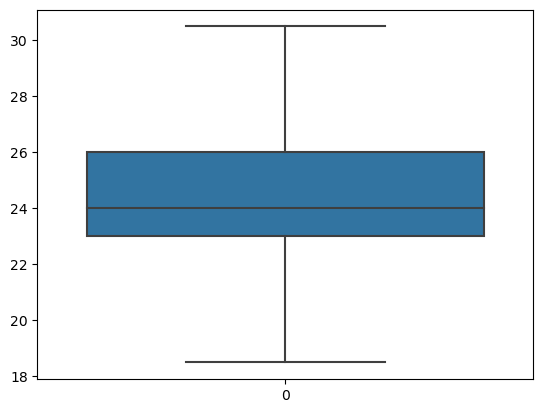

In [113]:
sns.boxplot(raw.Age)

* Here i did outliers detection and replacement with the particular data.

###  Data Pre-Processing

**Categorical to Numerical (Encoding)**

Machine needs data in numeric format, so we need to convert categorical to numerical, while observing the number of classes , because it will increase the dimensionality if we are converting them to one hot encoding.

* Ordinal Encoding for ordinal
    - lets assume cat column data : platinum, gold, silver
    - ordinal - platinum  >  gold  >  silver
                   3      >   2    >    1
                   
* One hot encoding for nominal
    - lets assume cat column data: a, b, c

a|b|c
--|--|--
1|0|0
1|0|0
0|1|0
0|0|1

**Ordinal encoding**
* Here we are giving manually without using label encoder function.

In [114]:
x.head()

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Marital_Status,Area
0,20,female,student,no_income,post_graduate,4,560001,positive,single,Shanthala_Nagar
1,24,female,student,low_income,graduate,3,560009,positive,single,Gandhinagar
2,22,male,student,low_income,post_graduate,3,560017,negative,single,Konena_Agrahara_Ward
3,22,female,student,no_income,graduate,6,560019,positive,single,Hanumanth_Nagar_Ward
4,22,male,student,low_income,post_graduate,4,560010,positive,single,Shivanagara


**Gender**
* Gender is replaced with the order of

            female   >    male
               0     >     1 

In [115]:
x.Gender.replace({'female':0,'male':1},inplace=True)

**Occupation**
* Occupation is replaced with the order of

        student > employee > self_employeed > house_wife 
         1      >     2    >      3         >     4  

In [116]:
x.Occupation.replace({'student':1,'employee':2,'self_employeed':3,'house_wife':4},inplace=True)

**Monthly_income**
* Monthly_Income is replaced with the order of

        no_income > low_income > moderate_income > high_income > very_high_income  
           1      >     2      >      3          >     4       >        5 

In [117]:
x.Monthly_Income.replace({'no_income':1,'low_income':2,'moderate_income':3,'high_income':4,'very_high_income':5},inplace=True)

**Educational_Qualifications**
* Educational_Qualifications is replaced with the order of

        Uneducated > School > Graduate > Post-graduate > Ph.D  
           1      >    2    >    3     >     4         >   5 

In [118]:
x.Educational_Qualifications.replace({'uneducated':1,'school':2,'graduate':3,'post_graduate':4,'ph_d':5},inplace=True)

**Feedback**

In [119]:
x.replace({'positive':1,'negative':0}, inplace = True)

In [120]:
x.head()

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Marital_Status,Area
0,20,0,1,1,4,4,560001,1,single,Shanthala_Nagar
1,24,0,1,2,3,3,560009,1,single,Gandhinagar
2,22,1,1,2,4,3,560017,0,single,Konena_Agrahara_Ward
3,22,0,1,1,3,6,560019,1,single,Hanumanth_Nagar_Ward
4,22,1,1,2,4,4,560010,1,single,Shivanagara


In [121]:
x.dtypes

Age                            int64
Gender                         int64
Occupation                     int64
Monthly_Income                 int64
Educational_Qualifications     int64
Family_size                    int64
Pin_code                       int64
Feedback                       int64
Marital_Status                object
Area                          object
dtype: object

In [122]:
x.shape

(285, 10)

In [123]:
x.head()

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Marital_Status,Area
0,20,0,1,1,4,4,560001,1,single,Shanthala_Nagar
1,24,0,1,2,3,3,560009,1,single,Gandhinagar
2,22,1,1,2,4,3,560017,0,single,Konena_Agrahara_Ward
3,22,0,1,1,3,6,560019,1,single,Hanumanth_Nagar_Ward
4,22,1,1,2,4,4,560010,1,single,Shivanagara


In [124]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', categories='auto', drop = 'first')

In [125]:
ohedata = ohe.fit_transform(x[['Marital_Status','Area']]).toarray()

In [126]:
ohedata = pd.DataFrame(ohedata, columns = ohe.get_feature_names_out())

In [127]:
x = pd.concat([x.iloc[:,0:],ohedata], axis = 1)

x.shape

(285, 82)

In [128]:
x.shape

(285, 82)

In [129]:
x.drop(['Marital_Status','Area'], axis = 1,inplace =True)

In [130]:
x.shape

(285, 80)

In [131]:
x.head()

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Marital_Status_prefer_not_to_say,Marital_Status_single,...,Area_Subramanyapura,Area_Suddagunte_Palya_Ward,Area_Sulthanpalya,Area_Thindlu,Area_Thyagaraja_Nagar,Area_Valmiki_Nagar,Area_Vannarpete_Ward,Area_Vasanth_Nagar,Area_Yelahanka_Satellite_Town,Area__
0,20,0,1,1,4,4,560001,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,0,1,2,3,3,560009,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22,1,1,2,4,3,560017,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22,0,1,1,3,6,560019,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,1,1,2,4,4,560010,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Scaling Numeric Data (if necessary)**

We need to apply scaling for the input numerical continuous columns which are in different scales only ,not to the one hot encoded vectors

Whenever we apply data for linear models we will can go with scaling part

* We have two scales
    - Standard Scale
    - Min Max Scale

In [132]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [133]:
x.shape

(285, 80)

In [134]:
x.describe()

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Marital_Status_prefer_not_to_say,Marital_Status_single,...,Area_Subramanyapura,Area_Suddagunte_Palya_Ward,Area_Sulthanpalya,Area_Thindlu,Area_Thyagaraja_Nagar,Area_Valmiki_Nagar,Area_Vannarpete_Ward,Area_Vasanth_Nagar,Area_Yelahanka_Satellite_Town,Area__
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,24.677193,0.575439,1.691228,2.526316,3.533333,3.270175,560037.280702,0.810526,0.031579,0.663158,...,0.007018,0.024561,0.007018,0.003509,0.003509,0.003509,0.003509,0.003509,0.007018,0.003509
std,3.040977,0.495146,0.819713,1.591187,0.719285,1.361178,30.738306,0.392574,0.175184,0.473462,...,0.083623,0.155056,0.083623,0.059235,0.059235,0.059235,0.059235,0.059235,0.083623,0.059235
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,560001.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,1.000000,1.000000,3.000000,2.000000,560010.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,1.000000,1.000000,2.000000,4.000000,3.000000,560028.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.000000,1.000000,2.000000,4.000000,4.000000,4.000000,560066.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.000000,1.000000,4.000000,5.000000,5.000000,6.000000,560109.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
x.head(2)

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Marital_Status_prefer_not_to_say,Marital_Status_single,...,Area_Subramanyapura,Area_Suddagunte_Palya_Ward,Area_Sulthanpalya,Area_Thindlu,Area_Thyagaraja_Nagar,Area_Valmiki_Nagar,Area_Vannarpete_Ward,Area_Vasanth_Nagar,Area_Yelahanka_Satellite_Town,Area__
0,20,0,1,1,4,4,560001,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,0,1,2,3,3,560009,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
x.iloc[:,[0,6]].head(2)

,Age,Pin_code
0,20,560001
1,24,560009


In [137]:
# Fit on train
x.iloc[:, [0,6]] = sc.fit_transform(x.iloc[:, [0,6]])

In [138]:
x.head()

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Marital_Status_prefer_not_to_say,Marital_Status_single,...,Area_Subramanyapura,Area_Suddagunte_Palya_Ward,Area_Sulthanpalya,Area_Thindlu,Area_Thyagaraja_Nagar,Area_Valmiki_Nagar,Area_Vannarpete_Ward,Area_Vasanth_Nagar,Area_Yelahanka_Satellite_Town,Area__
0,-1.540761,0,1,1,4,4,-1.182385,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.223081,0,1,2,3,3,-0.921666,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.881921,1,1,2,4,3,-0.660946,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.881921,0,1,1,3,6,-0.595767,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.881921,1,1,2,4,4,-0.889076,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train-Test Split

* Dividing Data (x,y) into train and test (Data Validation)

* for this we will use sklearn module
* we can go with 70,30 or 80,20 or 75,25 ratios

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=42)

In [141]:
# Index Reset

xtrain = xtrain.reset_index(drop=True)
ytrain = ytrain.reset_index(drop=True)
xtest = xtest.reset_index(drop=True)
ytest = ytest.reset_index(drop=True)

In [142]:
xtrain.shape, xtest.shape

((213, 80), (72, 80))

In [143]:
ytrain.shape, ytest.shape

((213,), (72,))

###  Modeling
* y data is a categorical binary data, we will be using ML Supervised classification algorithms

    - Logistic Regression
    - Knearest Neighbors (KNN)
    - Support Vector Machine (SVM)
    - Naive Bayes (NB)
    - Decision Trees (CART)
    - Random Forest (Bagging)
    - Xgboost (Boosting)

**Importing Libraries and Define Models**

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#### Logistic Regression

In [145]:
# Model Define

log = LogisticRegression()

It uses the Linear Regression line to convert it into a sigmoid curve with the logit function output as probability of class

    prob = 1/1+e^-y
    
    if prob>0.5 1 
    else 0

Learning/Training Model on train data

we can use **fit** function in model for xtrain and ytrain data to train our data for getting the line co-efficients

In [146]:
log.fit(xtrain, ytrain)

LogisticRegression()

Parameters

In [147]:
log.intercept_

array([-1.86228591])

In [148]:
log.coef_

array([[-0.14685764,  0.40812062,  0.273548  , -0.11327333,  0.24318641,
        -0.10035775,  0.08977727,  2.53198926, -0.47794546,  0.73162864,
        -0.5486541 ,  0.29049921,  0.82912801,  0.25583503,  0.09220964,
         0.28788203,  0.37760202,  0.28662162,  0.04630199, -0.18304082,
         0.14798526,  0.13566914,  0.05333699,  0.73698914,  0.08684436,
        -0.16080218,  0.0957434 , -0.47036531,  0.19110876, -1.29301775,
        -0.99927425,  0.06148446,  0.13086955, -0.02970761,  0.        ,
         0.23389749,  0.00675289,  0.87448513,  0.        ,  0.50327572,
        -1.10991471,  0.21207562, -0.89516615,  0.07013177,  0.12004079,
         0.        ,  0.31121536, -0.16792795, -1.29553323,  0.37528867,
         0.2785827 ,  0.29724533,  0.        , -0.32345948, -0.35915796,
        -0.06533449,  0.        ,  0.22498556,  0.        ,  0.15968115,
         0.53984237, -0.3700087 , -0.22374195, -0.34325904,  0.11895231,
         0.1952794 ,  0.04749421,  0.24972052, -0.0

#### KNN

In [149]:
knn = KNeighborsClassifier(n_neighbors=5, p=2)
# Here neighbors are the hyperparameter
# Distance is the another hyperparameter (p) 2 for euclidean distance

Knearest Neighbors

* It will take the nearest data points using euclidean distance metric with number of k given
* It is a lazy algorithm , it wont train the data instead it will store the data
* It will do the training when test data given

In [150]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [151]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Decision Regions Plotting

In [152]:
xtrain.head(2)

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Marital_Status_prefer_not_to_say,Marital_Status_single,...,Area_Subramanyapura,Area_Suddagunte_Palya_Ward,Area_Sulthanpalya,Area_Thindlu,Area_Thyagaraja_Nagar,Area_Valmiki_Nagar,Area_Vannarpete_Ward,Area_Vasanth_Nagar,Area_Yelahanka_Satellite_Town,Area__
0,-1.211341,1,1,1,3,3,1.783298,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.552501,1,1,1,4,2,1.261859,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
x_d = xtrain[['Gender','Feedback']]
y_d = ytrain

In [154]:
y_d

0      yes
1      yes
2       no
3      yes
4      yes
      ... 
208    yes
209    yes
210    yes
211     no
212    yes
Name: Output, Length: 213, dtype: object

In [155]:
y_d = np.where(y_d =='yes',1,0)

In [156]:
knn1 = KNeighborsClassifier(n_neighbors = 5, p=2)
knn1.fit(x_d,y_d)

KNeighborsClassifier()

In [157]:
# pip install mlxtend

In [158]:
from mlxtend.plotting import plot_decision_regions

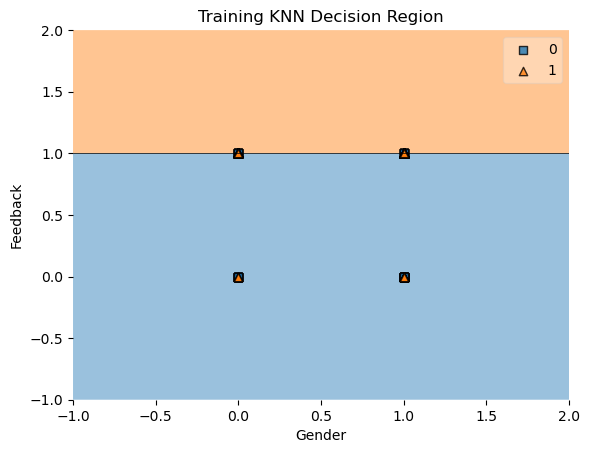

In [159]:
plot_decision_regions(np.array(x_d),np.array(y_d),clf=knn1)
plt.title("Training KNN Decision Region")
plt.xlabel("Gender")
plt.ylabel("Feedback")
plt.show()

#### Decision Tree

In [160]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# criteria is the root node selection method
# max_depth is the number of subtrees in decision  tree - main Hyperparameter

Logic Tree based predictions based on root and interior nodes, branches

In [161]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

**Feature Importance**

In [162]:
pd.DataFrame(index = dt.feature_names_in_,data = dt.feature_importances_, columns = ['FeatureImportance'])

,FeatureImportance
Age,0.110877
Gender,0.000000
Occupation,0.000000
Monthly_Income,0.045404
Educational_Qualifications,0.000000
...,...
Area_Valmiki_Nagar,0.000000
Area_Vannarpete_Ward,0.000000
Area_Vasanth_Nagar,0.000000
Area_Yelahanka_Satellite_Town,0.000000


**Tree**

In [163]:
from sklearn.tree import plot_tree

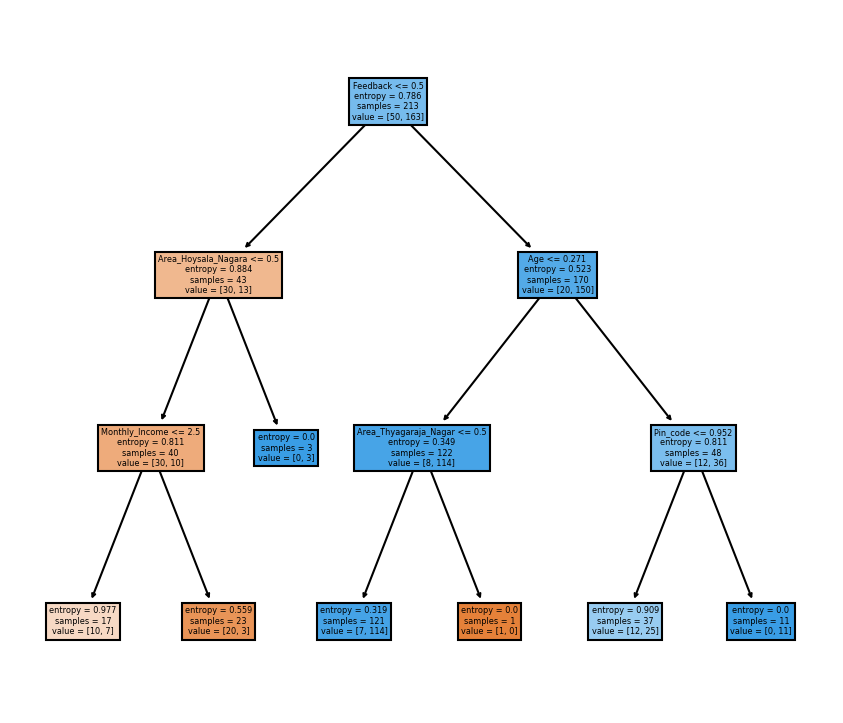

In [164]:
plt.figure(figsize=(7, 6), dpi=150)
plot_tree(dt, filled=True, feature_names=list(xtrain.columns))
plt.show()

#### Random Forest
Bagging algorithm which was a combination of Multiple Decision Trees

In [165]:
rf = RandomForestClassifier(n_estimators = 2, max_depth = 2, criterion = 'entropy', bootstrap = True)

# n_estimators are number of decision trees - Hyper parameter

In [166]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=2)

In [167]:
pd.DataFrame(index = rf.feature_names_in_,data = rf.feature_importances_, columns = ['FeatureImportance'])

,FeatureImportance
Age,0.0
Gender,0.0
Occupation,0.0
Monthly_Income,0.0
Educational_Qualifications,0.0
...,...
Area_Valmiki_Nagar,0.0
Area_Vannarpete_Ward,0.0
Area_Vasanth_Nagar,0.0
Area_Yelahanka_Satellite_Town,0.0


Trees

In [168]:
rf.estimators_

[DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                        random_state=310515620),
 DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                        random_state=1650015219)]

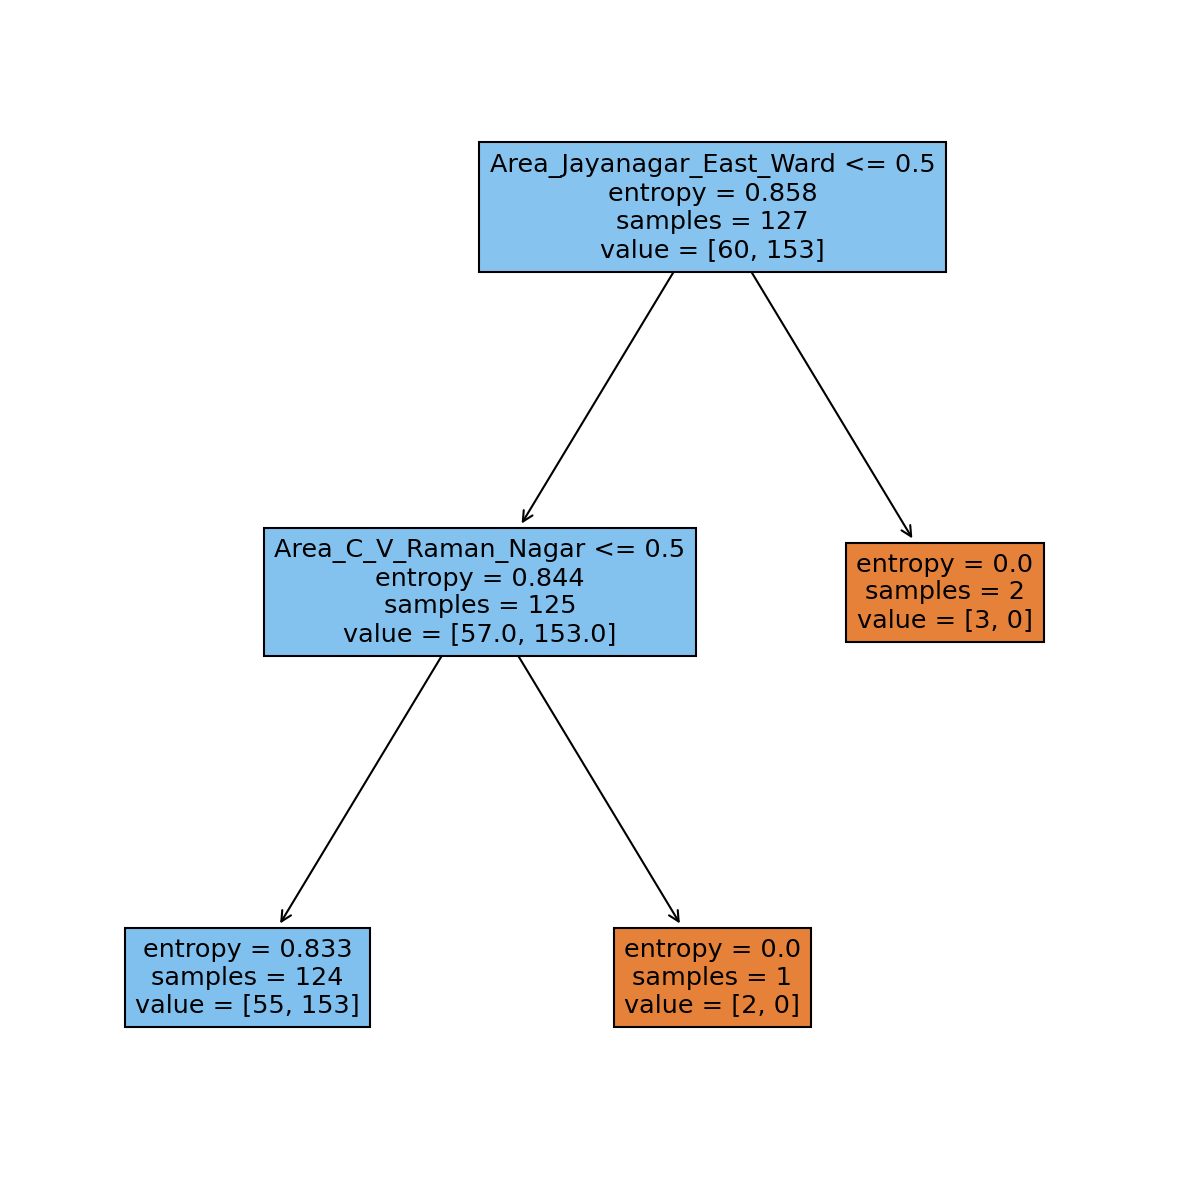

In [169]:
plt.figure(figsize = (10,10),dpi = 150)
plot_tree(rf.estimators_[1],filled = True, feature_names=list(xtrain.columns))
plt.show()

#### SVM (Time Taking for Higher Dimensional Data)

Support vectors (Data Points taken to Identify Maximal Margin Classifier) - for linear data

for non-linear data kernel trick is used to divide classes - rbf , poly

In [170]:
sv = SVC(kernel = 'rbf', gamma=5) # for a non-linear seperable data

# Gamma=Sigma=coeffient for the rbf kernel - hyperparameter

#Kernel linear-- Linear SVM

#sv = SVC(kernel="linear") # for a linear separable data

#### Naive Bayes

Naive Bayes works on Bayesian Probability formula

In [171]:
nb = GaussianNB()

In [172]:
nb.fit(xtrain, ytrain)

GaussianNB()

#### Xgboost

Boosting Algorithm where for the selected number of models , one model error will be trained by another model

we need to install xgboost, using anaconda prompt - pip install xgboost

In [173]:
xgb = XGBClassifier(n_estimators=10,reg_alpha=0.5)

In [174]:
xgb = XGBClassifier(n_estimators=10,reg_alpha=0.5)

In [175]:
# xgboost accepts label data as number

ytrain_xg = np.where(ytrain == 'yes',1,0)

In [176]:
xgb.fit(xtrain,ytrain_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Model Performance
* Checking Trained Model Performances on Test Data

* Using x_test data we will be getting predictions, these predictions will be compared to y_test

* To check Model Performance we can use evaluation methods

    * Error/Loss
    * Model Score 
    * Bias-Variance Trade off (Underfit or Overfit)
    * Cross-Val Score

For classification we can use these evaluation


Performance Metric | Classification
-------|-----------
**Loss or Error**|**Confusion Matrix (Number of right/wrong predictions)**
**Model Score (Evaluation)** | **Accuracy Score (Balanced Data) , F1-Score/Auc-Roc Score (For Imbalanced Data)**
**Bias-Variance Trade Off**|Higher error & Lower score (underfit)
-|Low Train error & High Test error (Overfit)
**Cross-Val Score**|Checking trained model performance on entire X and y data

**As we have imbalanced data considering auc-roc score for better understanding model**

In [177]:
# Modules for Metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score

**Checking the above models perfomance using Test data**

In [178]:
names = ['LogisticRegression', 'KNearestNeighbors', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Xgboost']

models = [log, knn, nb, dt, rf, xgb]

# KNN & SVM will take more time

**Confusion_matrix, Classification_report & auc-roc curve score**

Model: LogisticRegression

Classification Report:
               precision    recall  f1-score   support

          no       0.86      0.33      0.48        18
         yes       0.82      0.98      0.89        54

    accuracy                           0.82        72
   macro avg       0.84      0.66      0.69        72
weighted avg       0.83      0.82      0.79        72

Confusion_Matrix:


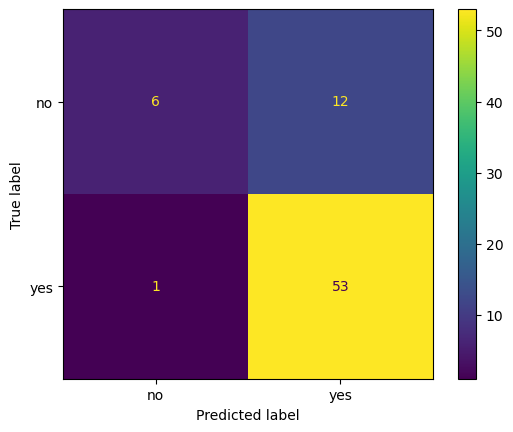

AUC-ROC:


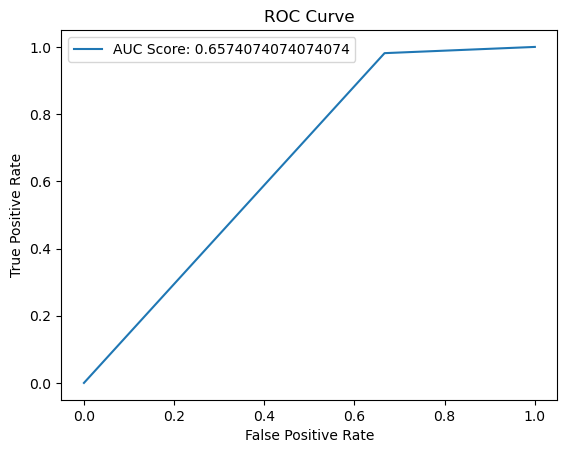

-----------------------------------------------------------------------------------
Model: KNearestNeighbors

Classification Report:
               precision    recall  f1-score   support

          no       0.60      0.17      0.26        18
         yes       0.78      0.96      0.86        54

    accuracy                           0.76        72
   macro avg       0.69      0.56      0.56        72
weighted avg       0.73      0.76      0.71        72

Confusion_Matrix:


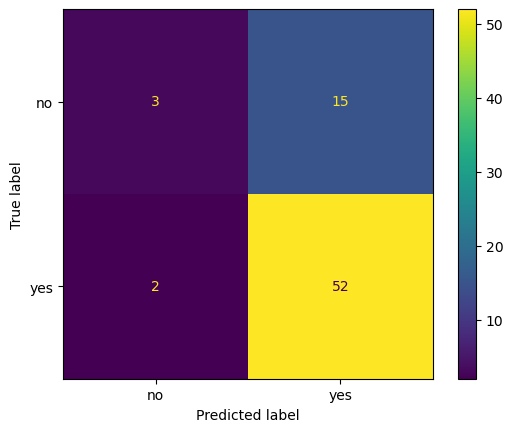

AUC-ROC:


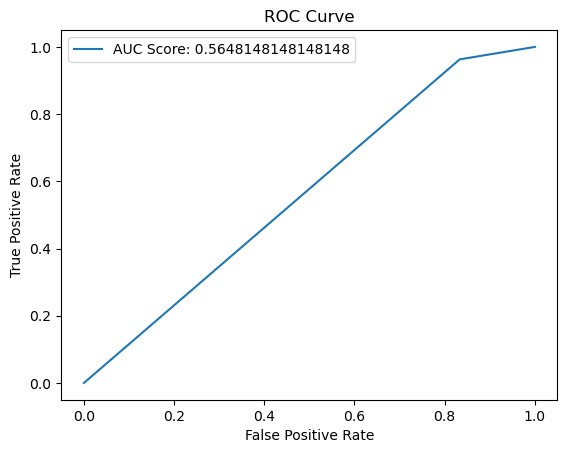

-----------------------------------------------------------------------------------
Model: Naive Bayes

Classification Report:
               precision    recall  f1-score   support

          no       0.29      0.83      0.43        18
         yes       0.86      0.33      0.48        54

    accuracy                           0.46        72
   macro avg       0.58      0.58      0.46        72
weighted avg       0.72      0.46      0.47        72

Confusion_Matrix:


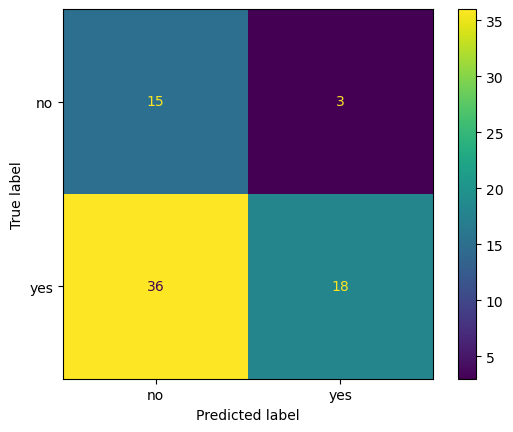

AUC-ROC:


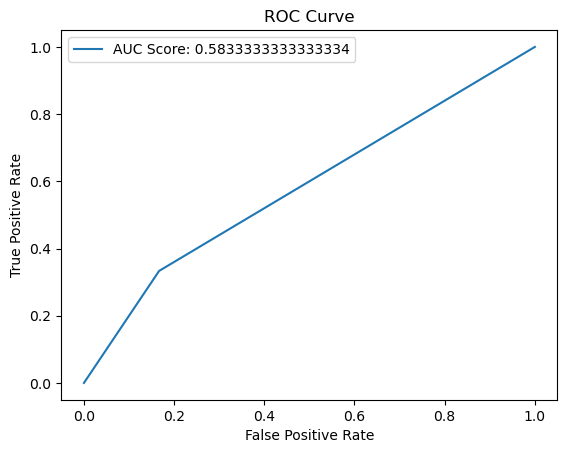

-----------------------------------------------------------------------------------
Model: Decision Tree

Classification Report:
               precision    recall  f1-score   support

          no       0.89      0.44      0.59        18
         yes       0.84      0.98      0.91        54

    accuracy                           0.85        72
   macro avg       0.87      0.71      0.75        72
weighted avg       0.85      0.85      0.83        72

Confusion_Matrix:


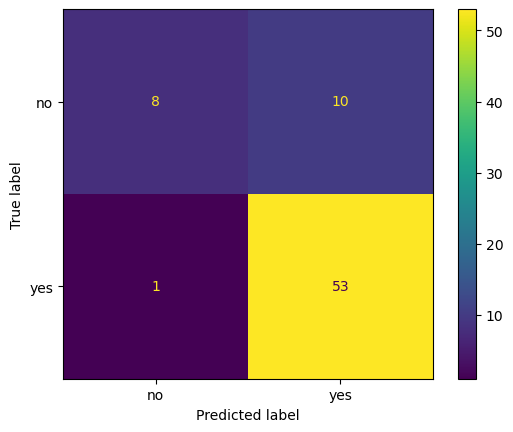

AUC-ROC:


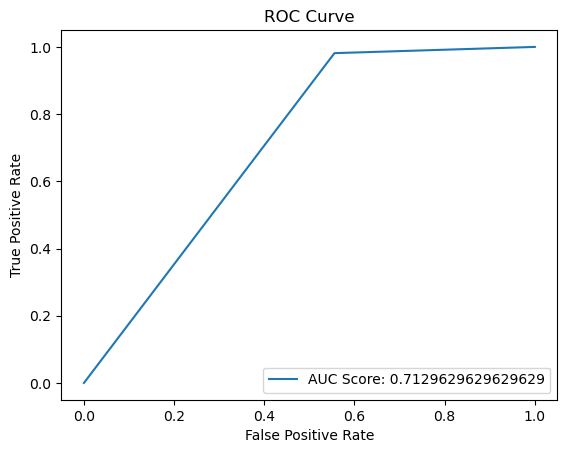

-----------------------------------------------------------------------------------
Model: Random Forest

Classification Report:
               precision    recall  f1-score   support

          no       0.00      0.00      0.00        18
         yes       0.75      0.98      0.85        54

    accuracy                           0.74        72
   macro avg       0.37      0.49      0.42        72
weighted avg       0.56      0.74      0.64        72

Confusion_Matrix:


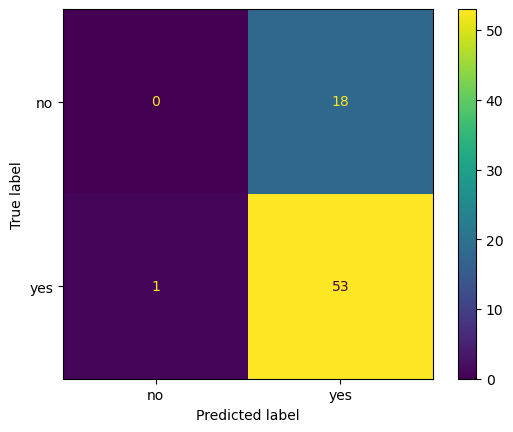

AUC-ROC:


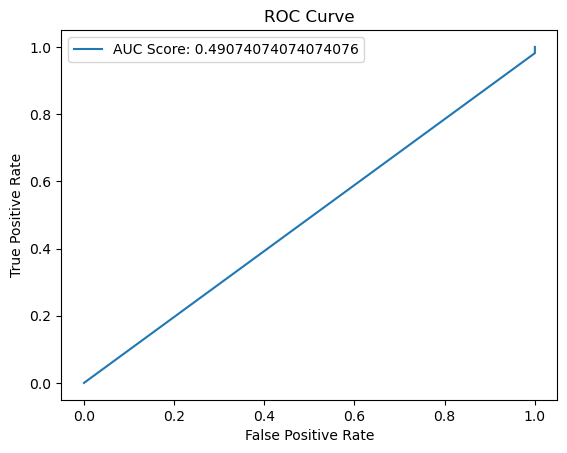

-----------------------------------------------------------------------------------
Model: Xgboost

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.61      0.71        18
           1       0.88      0.96      0.92        54

    accuracy                           0.88        72
   macro avg       0.86      0.79      0.82        72
weighted avg       0.87      0.88      0.87        72

Confusion_Matrix:


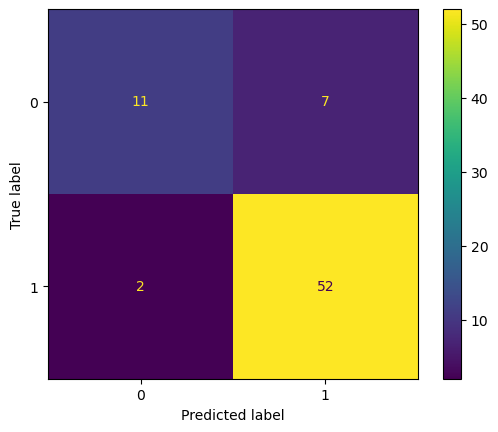

AUC-ROC:


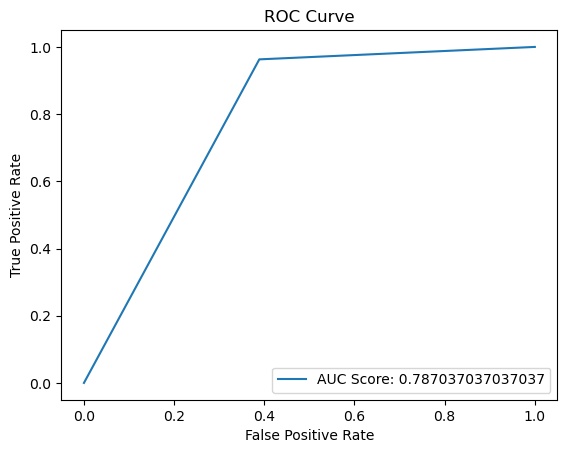

-----------------------------------------------------------------------------------


In [179]:
from termcolor import colored
import matplotlib.pyplot as plt

# Assuming you have imported necessary libraries and defined models, xtest, and ytest earlier

for i in range(len(models)):
    print(colored("Model: {}\n".format(names[i]), 'green', attrs=['bold']))
    if models[i] == xgb:
        ytest_pred = models[i].predict(xtest)
        ytest = np.where(ytest == 'yes', 1, 0)
        print("Classification Report:\n", classification_report(ytest, ytest_pred))
        print(colored("Confusion_Matrix:", 'blue', attrs=['bold']))
        plt.show(ConfusionMatrixDisplay.from_estimator(models[i], xtest, ytest))
        print(colored("AUC-ROC:", 'red', attrs=['bold']))
        fpr, tpr, threshold = roc_curve(ytest, ytest_pred)
        ytest = np.where(ytest == 1, 'yes', 'no')
        auc_score = auc(fpr, tpr)
        auc_str = "AUC Score: " + str(auc_score)
        plt.plot(fpr, tpr, label=auc_str)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()
        print("-----------------------------------------------------------------------------------")
    else:
        ytest_pred = models[i].predict(xtest)
        print("Classification Report:\n", classification_report(ytest, ytest_pred))
        print(colored("Confusion_Matrix:", 'blue', attrs=['bold']))
        plt.show(ConfusionMatrixDisplay.from_estimator(models[i], xtest, ytest))
        print(colored("AUC-ROC:", 'red', attrs=['bold']))
        ytest = np.where(ytest == 'yes', 1, 0)
        ytest_pred = np.where(ytest_pred == 'yes', 1, 0)
        fpr, tpr, threshold = roc_curve(ytest, ytest_pred)
        ytest = np.where(ytest == 1, 'yes', 'no')
        auc_score = auc(fpr, tpr)
        auc_str = "AUC Score: " + str(auc_score)
        plt.plot(fpr, tpr, label=auc_str)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()
        print("-----------------------------------------------------------------------------------")

**Checking accuracy_scores for train and test both**

In [180]:
Model = []
Trainedmodel = []
trainscore = []
testscore = []
fit = []

In [181]:
for i in range(len(models)):
    
    if models[i] == xgb:
        
        ytrain = np.where(ytrain == 'yes',1,0)
        ytest = np.where(ytest == 'yes',1,0)
        
        ytrain_pred = models[i].predict(xtrain)
        ytest_pred = models[i].predict(xtest)
        
        fpr_tr, tpr_tr, threshold_tr = roc_curve(ytrain, ytrain_pred)
        auc_score_tr = auc(fpr_tr, tpr_tr)
        
        fpr_te, tpr_te, threshold_te = roc_curve(ytest, ytest_pred)
        auc_score_te = auc(fpr_te, tpr_te)

        trainscore.append(auc_score_tr)
        testscore.append(auc_score_te)

        trscore = auc_score_tr
        tescore = auc_score_te

        if trscore<0.50 and tescore<0.50:
            fit.append("Underfit")
        elif trscore>0.70 and tescore<0.60:
            fit.append("Overfit")
        else:
            fit.append("Goodfit")
        
        ytrain = np.where(ytrain == 1,'yes','no')
        ytest = np.where(ytest == 1,'yes','no')
        
    else:
        
        ytrain = np.where(ytrain == 'yes',1,0)
        ytest = np.where(ytest == 'yes',1,0)
        
        ytrain_pred = models[i].predict(xtrain)
        ytest_pred = models[i].predict(xtest)
        
        ytrain_pred = np.where(ytrain_pred == 'yes',1,0)
        ytest_pred = np.where(ytest_pred == 'yes',1,0)
        
        fpr_tr, tpr_tr, threshold_tr = roc_curve(ytrain, ytrain_pred)
        auc_score_tr = auc(fpr_tr, tpr_tr)
        
        fpr_te, tpr_te, threshold_te = roc_curve(ytest, ytest_pred)
        auc_score_te = auc(fpr_te, tpr_te)

        trainscore.append(auc_score_tr)
        testscore.append(auc_score_te)

        trscore = auc_score_tr
        tescore = auc_score_te

        if trscore<0.50 and tescore<0.50:
            fit.append("Underfit")
        elif trscore>0.70 and tescore<0.60:
            fit.append("Overfit")
        else:
            fit.append("Goodfit")
        
        ytrain = np.where(ytrain == 1,'yes','no')
        ytest = np.where(ytest == 1,'yes','no')
        
        ytrain_pred = np.where(ytrain_pred == 1,'yes','no')
        ytest_pred = np.where(ytest_pred == 1,'yes','no')

In [182]:
pd.DataFrame({'Model':names, 'Trainedmodel':models,'Trainscore':trainscore, 'Testscore':testscore, 'Fit':fit})

,Model,Trainedmodel,Trainscore,Testscore,Fit
0,LogisticRegression,LogisticRegression(),0.764663,0.657407,Goodfit
1,KNearestNeighbors,KNeighborsClassifier(),0.785460,0.564815,Overfit
2,Naive Bayes,GaussianNB(),0.717791,0.583333,Overfit
3,Decision Tree,"DecisionTreeClassifier(criterion='entropy', ma...",0.779325,0.712963,Goodfit
4,Random Forest,"(DecisionTreeClassifier(criterion='entropy', m...",0.556933,0.490741,Goodfit
5,Xgboost,"XGBClassifier(base_score=None, booster=None, c...",0.887730,0.787037,Goodfit


#### Better Performance Model:

From the Observation of above results

**Xgboost Given Better accuracy score for both train and test compared to Other**

### Real time predictions

* Using best model to predict future given data

In [184]:
d1 = raw['Output']
data = raw.drop('Output',axis=1)

In [185]:
data.head(2)

,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Marital_Status,Area
0,20.0,female,student,no_income,post_graduate,4,560001,positive,single,Shanthala_Nagar
1,24.0,female,student,low_income,graduate,3,560009,positive,single,Gandhinagar


In [186]:
print("Enter details: ")
print(data.columns)
print()

Age = float(input("Enter Age :"))
Gender = input("Enter Gender:")
Occupation = input("enter Occupation:")
Monthly_Income = input("enter Monthly_Income:")
Educational_Qualifications = input("enter Educational_Qualifications :")
Family_size = int(input("enter Family_size:"))
Pin_code = input("Enter Pin_code:")
Feedback = input("Enter Feedback:")
Marital_Status = input("enter Marital_Status:")
Area = input("enter Area:")


row = [Age, Gender, Occupation, Monthly_Income, Educational_Qualifications, Family_size, Pin_code, Feedback, Marital_Status, Area]
rdata = pd.DataFrame([row], columns=['Age', 'Gender', 'Occupation', 'Monthly_Income','Educational_Qualifications', 
                                     'Family_size', 'Pin_code','Feedback','Marital_Status', 'Area'])

print("Given Details: ")
display(rdata.head())
print()
data = rdata
data.Gender.replace({'female':0,'male':1},inplace=True)
data.Occupation.replace({'student':1,'employee':2,'self_employeed':3,'house_wife':4},inplace=True)
data.Monthly_Income.replace({'no_income':1,'low_income':2,'moderate_income':3,'high_income':4,'very_high_income':5},inplace=True)
data.Educational_Qualifications.replace({'uneducated':1,'school':2,'graduate':3,'post_graduate':4,'ph_d':5},inplace=True)
data.replace({'positive':1,'negative':0}, inplace = True)


ohedata = ohe.transform(data[['Marital_Status','Area']]).toarray()
ohedata = pd.DataFrame(ohedata, columns = ohe.get_feature_names_out())
data = pd.concat([data.iloc[:,0:],ohedata], axis = 1)
data.drop(['Marital_Status','Area'], axis = 1,inplace =True)


data.iloc[:, [0,6]] = sc.fit_transform(data.iloc[:, [0,6]])
result = xgb.predict(data)[0]
result = {0: 'no', 1: 'yes'}[result]
print("OrderAgain yes or not: ", result)

Enter details: 
Index(['Age', 'Gender', 'Occupation', 'Monthly_Income',
       'Educational_Qualifications', 'Family_size', 'Pin_code', 'Feedback',
       'Marital_Status', 'Area'],
      dtype='object')

Enter Age :22.0
Enter Gender:male
enter Occupation:student
enter Monthly_Income:low_income
enter Educational_Qualifications :post_graduate
enter Family_size:4
Enter Pin_code:560010
Enter Feedback:positive
enter Marital_Status:single
enter Area:Shivanagara
Given Details: 


,Age,Gender,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Pin_code,Feedback,Marital_Status,Area
0,22.0,male,student,low_income,post_graduate,4,560010,positive,single,Shivanagara



OrderAgain yes or not:  yes


**Completed**

### Deployment

In [192]:
# Library
import joblib

In [194]:
# Pickled file

joblib.dump(xgb, "onlinefoods_rfxgb.pkl")

['onlinefoods_rfxgb.pkl']